# Econ 441A Assignment 3
## Juntao Li
## Student ID: 906092273

### 1/a)

In [1]:
import wooldridge as woo
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
wage=woo.data('wage1')

In [2]:
reg1=smf.ols('np.log(wage)~educ+exper+tenure+female+married+numdep',data=wage)
results1=reg1.fit()
stats.jarque_bera(results1.resid)
results1.params

Intercept    0.489350
educ         0.083941
exper        0.003140
tenure       0.016866
female      -0.285559
married      0.125566
numdep       0.000267
dtype: float64

#### Since the p-value of JB test is less than 0.05, the residuals from this regression is not normally distributed.

### 1/b)

In [3]:
xrange1 = np.linspace(wage.educ.min(), wage.educ.max(), 526)
xrange2 = np.linspace(wage.exper.min(), wage.exper.max(), 526)
xrange3 = np.linspace(wage.tenure.min(), wage.tenure.max(), 526)
xrange4 = np.linspace(wage.female.min(), wage.female.max(), 526)
xrange5 = np.linspace(wage.married.min(), wage.married.max(), 526)
xrange6 = np.linspace(wage.numdep.min(), wage.numdep.max(), 526)
df = pd.DataFrame()
df['educ']=pd.Series(xrange1)
df['exper']=pd.Series(xrange2)
df['tenure']=pd.Series(xrange3)
df['female']=pd.Series(xrange4)
df['married']=pd.Series(xrange5)
df['numdep']=pd.Series(xrange6)

In [4]:
predictions = results1.get_prediction(df)
predictions = predictions.summary_frame(alpha=0.05)
predictions

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,0.492490,0.108152,0.280019,0.704960,-0.345946,1.330926
1,0.496779,0.107780,0.285039,0.708518,-0.341472,1.335030
2,0.501068,0.107409,0.290058,0.712077,-0.336999,1.339134
3,0.505356,0.107038,0.295076,0.715637,-0.332527,1.343240
4,0.509645,0.106667,0.300093,0.719197,-0.328056,1.347346
...,...,...,...,...,...,...
521,2.726984,0.145575,2.440996,3.012972,1.866972,3.586996
522,2.731273,0.145977,2.444495,3.018051,1.870998,3.591547
523,2.735562,0.146379,2.447994,3.023129,1.875024,3.596100
524,2.739851,0.146781,2.451493,3.028208,1.879048,3.600653


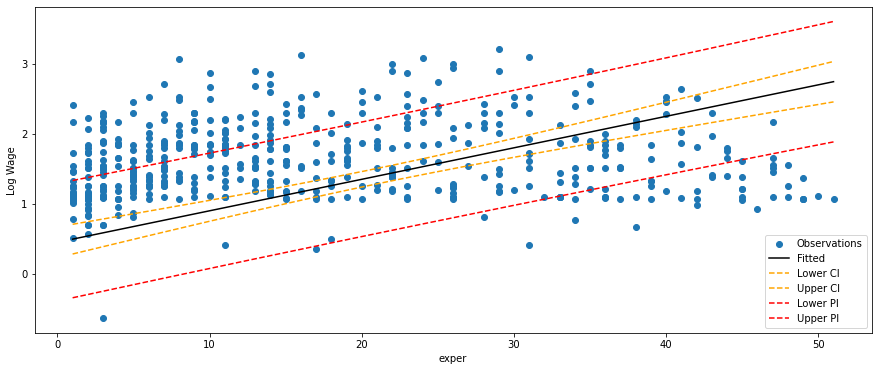

In [5]:
plt.figure(figsize = (15, 6))
plt.scatter(wage.exper, np.log(wage.wage))
plt.plot(xrange2, predictions["mean"], color = "black")

plt.xlabel("exper")
plt.ylabel("Log Wage")

# confidence Intervals
plt.plot(xrange2, predictions["mean_ci_lower"], color = "orange", linestyle = '--')
plt.plot(xrange2, predictions["mean_ci_upper"], color = "orange", linestyle = '--')

# prediction Intervals
plt.plot(xrange2, predictions["obs_ci_lower"], color = "red", linestyle = '--')
plt.plot(xrange2, predictions["obs_ci_upper"], color = "red", linestyle = '--')

plt.legend(["Observations", "Fitted", "Lower CI", "Upper CI","Lower PI", "Upper PI"])

### 1/c)

In [6]:
coefs = pd.DataFrame(columns = ["B0","B1","B2","B3","B4","B5","B6"])

for i in range(1000):
    sample = wage.sample(wage.shape[0] ,replace = True)
    b0,b1,b2,b3,b4,b5,b6 = results1.params
    coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5, "B6":b6}, ignore_index = True)

C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5, "B6":b6}, ignore_index = True)
C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5, "B6":b6}, ignore_index = True)
C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5, "B6":b6}, ignore_index = True)
C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: Future

C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5, "B6":b6}, ignore_index = True)
C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5, "B6":b6}, ignore_index = True)
C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5, "B6":b6}, ignore_index = True)
C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: Future

C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5, "B6":b6}, ignore_index = True)
C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5, "B6":b6}, ignore_index = True)
C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5, "B6":b6}, ignore_index = True)
C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: Future

C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5, "B6":b6}, ignore_index = True)
C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5, "B6":b6}, ignore_index = True)
C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5, "B6":b6}, ignore_index = True)
C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: Future

C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5, "B6":b6}, ignore_index = True)
C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5, "B6":b6}, ignore_index = True)
C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5, "B6":b6}, ignore_index = True)
C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: Future

C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5, "B6":b6}, ignore_index = True)
C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5, "B6":b6}, ignore_index = True)
C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5, "B6":b6}, ignore_index = True)
C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: Future

C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5, "B6":b6}, ignore_index = True)
C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5, "B6":b6}, ignore_index = True)
C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5, "B6":b6}, ignore_index = True)
C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: Future

C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5, "B6":b6}, ignore_index = True)
C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5, "B6":b6}, ignore_index = True)
C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5, "B6":b6}, ignore_index = True)
C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: Future

C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5, "B6":b6}, ignore_index = True)
C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5, "B6":b6}, ignore_index = True)
C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5, "B6":b6}, ignore_index = True)
C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: Future

C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5, "B6":b6}, ignore_index = True)
C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5, "B6":b6}, ignore_index = True)
C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5, "B6":b6}, ignore_index = True)
C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: Future

C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5, "B6":b6}, ignore_index = True)
C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5, "B6":b6}, ignore_index = True)
C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5, "B6":b6}, ignore_index = True)
C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: Future

C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5, "B6":b6}, ignore_index = True)
C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5, "B6":b6}, ignore_index = True)
C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5, "B6":b6}, ignore_index = True)
C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: Future

C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5, "B6":b6}, ignore_index = True)
C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5, "B6":b6}, ignore_index = True)
C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5, "B6":b6}, ignore_index = True)
C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: Future

C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5, "B6":b6}, ignore_index = True)
C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5, "B6":b6}, ignore_index = True)
C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5, "B6":b6}, ignore_index = True)
C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: Future

C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5, "B6":b6}, ignore_index = True)
C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5, "B6":b6}, ignore_index = True)
C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5, "B6":b6}, ignore_index = True)
C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: Future

C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5, "B6":b6}, ignore_index = True)
C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5, "B6":b6}, ignore_index = True)
C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5, "B6":b6}, ignore_index = True)
C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: Future

C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5, "B6":b6}, ignore_index = True)
C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5, "B6":b6}, ignore_index = True)
C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5, "B6":b6}, ignore_index = True)
C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: Future

C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5, "B6":b6}, ignore_index = True)
C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5, "B6":b6}, ignore_index = True)
C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5, "B6":b6}, ignore_index = True)
C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: Future

C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5, "B6":b6}, ignore_index = True)
C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5, "B6":b6}, ignore_index = True)
C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5, "B6":b6}, ignore_index = True)
C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: Future

C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5, "B6":b6}, ignore_index = True)
C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5, "B6":b6}, ignore_index = True)
C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5, "B6":b6}, ignore_index = True)
C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: Future

C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5, "B6":b6}, ignore_index = True)
C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5, "B6":b6}, ignore_index = True)
C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5, "B6":b6}, ignore_index = True)
C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: Future

C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5, "B6":b6}, ignore_index = True)
C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5, "B6":b6}, ignore_index = True)
C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5, "B6":b6}, ignore_index = True)
C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: Future

C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5, "B6":b6}, ignore_index = True)
C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5, "B6":b6}, ignore_index = True)
C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5, "B6":b6}, ignore_index = True)
C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: Future

C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5, "B6":b6}, ignore_index = True)
C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5, "B6":b6}, ignore_index = True)
C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5, "B6":b6}, ignore_index = True)
C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: Future

C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5, "B6":b6}, ignore_index = True)
C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5, "B6":b6}, ignore_index = True)
C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5, "B6":b6}, ignore_index = True)
C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: Future

C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5, "B6":b6}, ignore_index = True)
C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5, "B6":b6}, ignore_index = True)
C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5, "B6":b6}, ignore_index = True)
C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: Future

C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5, "B6":b6}, ignore_index = True)
C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5, "B6":b6}, ignore_index = True)
C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5, "B6":b6}, ignore_index = True)
C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: Future

C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5, "B6":b6}, ignore_index = True)
C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5, "B6":b6}, ignore_index = True)
C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5, "B6":b6}, ignore_index = True)
C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: Future

C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5, "B6":b6}, ignore_index = True)
C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5, "B6":b6}, ignore_index = True)
C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5, "B6":b6}, ignore_index = True)
C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: Future

C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5, "B6":b6}, ignore_index = True)
C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5, "B6":b6}, ignore_index = True)
C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5, "B6":b6}, ignore_index = True)
C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: Future

C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5, "B6":b6}, ignore_index = True)
C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5, "B6":b6}, ignore_index = True)
C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5, "B6":b6}, ignore_index = True)
C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: Future

C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5, "B6":b6}, ignore_index = True)
C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5, "B6":b6}, ignore_index = True)
C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5, "B6":b6}, ignore_index = True)
C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: Future

C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5, "B6":b6}, ignore_index = True)
C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5, "B6":b6}, ignore_index = True)
C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coefs = coefs.append({"B0":b0, "B1":b1, "B2":b2, "B3":b3, "B4":b4, "B5":b5, "B6":b6}, ignore_index = True)
C:\Users\10945\AppData\Local\Temp\ipykernel_26888\1866788683.py:6: Future

In [7]:
b2_u = coefs.iloc[:, 2].quantile(.975)
b2_l = coefs.iloc[:, 2].quantile(.025)
print(b2_l,b2_u)

0.00313980647797479 0.00313980647797479


In [8]:
se_bt = coefs.B2.std(ddof = 1)
print('The bootstrap standard error is',se_bt)

The bootstrap standard error is 8.677957443893374e-19


In [9]:
print('The bootstrap CI is',[b2-1.96*se_bt, b2+1.96*se_bt])

The bootstrap CI is [0.0031398064779747884, 0.003139806477974792]


#### Since the confidence interval does not include 0, beta2 is different from 0.

### 1/d)

In [10]:
subdata = wage[["wage", "educ", "exper", "tenure", "female", "married", "numdep"]].copy()

In [18]:
!pip install RegscorePy
from RegscorePy import mallow
import itertools

model=smf.ols('np.log(wage)~educ+exper+tenure+female+married+numdep',data=wage)
results2 = model.fit()
y = np.log(wage['wage'])
y_pred=results2.fittedvalues


storage_cp = pd.DataFrame(columns = ["Variables", "CP"])
k = 7

for L in range(1, len(subdata.columns[1:]) + 1):
    for subset in itertools.combinations(subdata.columns[1:], L):

        formula1 = 'np.log(wage)~'+'+'.join(subset)
        results = smf.ols(formula=formula1, data = wage).fit()
        y_sub = results.fittedvalues
        p = len(subset)+1
        cp = mallow.mallow(y, y_pred,y_sub, k, p)
        storage_cp = storage_cp.append({'Variables': subset, 'CP': cp}, ignore_index = True)

final = pd.DataFrame(storage_cp.sort_values(by = "CP"))
pd.set_option('display.max_colwidth', -1)

C:\Users\10945\AppData\Local\Temp\ipykernel_26888\552530531.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage_cp = storage_cp.append({'Variables': subset, 'CP': cp}, ignore_index = True)
C:\Users\10945\AppData\Local\Temp\ipykernel_26888\552530531.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage_cp = storage_cp.append({'Variables': subset, 'CP': cp}, ignore_index = True)
C:\Users\10945\AppData\Local\Temp\ipykernel_26888\552530531.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage_cp = storage_cp.append({'Variables': subset, 'CP': cp}, ignore_index = True)
C:\Users\10945\AppData\Local\Temp\ipykernel_26888\552530531.py:22: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\10945\AppData\Local\Temp\ipykernel_26888\552530531.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage_cp = storage_cp.append({'Variables': subset, 'CP': cp}, ignore_index = True)
C:\Users\10945\AppData\Local\Temp\ipykernel_26888\552530531.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage_cp = storage_cp.append({'Variables': subset, 'CP': cp}, ignore_index = True)
C:\Users\10945\AppData\Local\Temp\ipykernel_26888\552530531.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage_cp = storage_cp.append({'Variables': subset, 'CP': cp}, ignore_index = True)
C:\Users\10945\AppData\Local\Temp\ipykernel_26888\552530531.py:22: FutureWarning: The frame.append method is deprecated and will be removed

C:\Users\10945\AppData\Local\Temp\ipykernel_26888\552530531.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage_cp = storage_cp.append({'Variables': subset, 'CP': cp}, ignore_index = True)
C:\Users\10945\AppData\Local\Temp\ipykernel_26888\552530531.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage_cp = storage_cp.append({'Variables': subset, 'CP': cp}, ignore_index = True)
C:\Users\10945\AppData\Local\Temp\ipykernel_26888\552530531.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  storage_cp = storage_cp.append({'Variables': subset, 'CP': cp}, ignore_index = True)
C:\Users\10945\AppData\Local\Temp\ipykernel_26888\552530531.py:22: FutureWarning: The frame.append method is deprecated and will be removed

In [19]:
final.head()

,Variables,CP
56,"(educ, exper, tenure, female, married)",5.000309
47,"(educ, tenure, female, married)",6.465083
62,"(educ, exper, tenure, female, married, numdep)",7.0
60,"(educ, tenure, female, married, numdep)",8.3484
41,"(educ, exper, tenure, female)",12.869873


#### Since the model "log(wage)~educ+exper+tenure+female+married" has the least CP score, it yielded the best result.

### 1/e)

In [12]:
from sklearn.model_selection import KFold 
kf = KFold(n_splits = 5)

rmse1 = []
for train_index, test_index in kf.split(wage):
    results3 = smf.ols('np.log(wage) ~ educ+exper+tenure+female+married+numdep', wage.iloc[train_index]).fit()
    s = np.sqrt(((np.log(wage.iloc[test_index]["wage"]) - results3.predict(wage.iloc[test_index]))**2).mean())
    rmse1.append(s)
print('Mean of 5-fold RMSE of the model in a):',np.mean(rmse1))

Mean of 5-fold RMSE of the model in a): 0.41637881003782107


In [13]:
from sklearn.model_selection import KFold 
kf = KFold(n_splits = 5)

rmse2 = []
for train_index, test_index in kf.split(wage):
    results4 = smf.ols('np.log(wage) ~ educ+exper+tenure+female+married', wage.iloc[train_index]).fit()
    s = np.sqrt(((np.log(wage.iloc[test_index]["wage"]) - results4.predict(wage.iloc[test_index]))**2).mean())
    rmse2.append(s)
print('Mean of 5-fold RMSE of the model in d):',np.mean(rmse2))

Mean of 5-fold RMSE of the model in d): 0.4151900664105206


#### Since the RMSE of the model in d) is lower than the RMSE of the model in a), the model in d) perfroms the best.

### 2/a)

In [14]:
vote=woo.data('VOTE1')
vote.head()

,state,district,democA,voteA,expendA,expendB,prtystrA,lexpendA,lexpendB,shareA
0,AL,7,1,68,328.295990,8.737000,41,5.793916,2.167567,97.407669
1,AK,1,0,62,626.377014,402.476990,60,6.439952,5.997638,60.881039
2,AZ,2,1,73,99.607002,3.065000,55,4.601233,1.120048,97.014763
3,AZ,3,0,69,319.690002,26.281000,64,5.767352,3.268846,92.403702
4,AR,3,0,75,159.220993,60.054001,66,5.070293,4.095244,72.612473


#### The partial effect of expendB on voteA is d(voteA)/d(expendB) = beta_3 + beta_4 * expendA. And the partial effect of expendA on voteA is d(voteA)/d(expendA) = beta_2 + beta_4 * expendB. The expected sign for beta_4 is not obvious since the increase in expendA will increase voteA while the increase in expendB will decrease voteA.

### 2/b)

In [15]:
reg4=smf.ols('voteA~prtystrA+expendA*expendB',data=vote)
results4=reg4.fit()
results4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  voteA   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     55.86
Date:                Sat, 29 Oct 2022   Prob (F-statistic):           6.77e-30
Time:                        19:50:47   Log-Likelihood:                -659.75
No. Observations:                 173   AIC:                             1329.
Df Residuals:                     168   BIC:                             1345.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          32.1174      4.591      6.995      0.000      23.054      41.181
prtystrA            0.3419      0.088      3.886      0.000       0.168       0.516
expendA             0.0383      0.005      7.718      0.000       0.028       0.048
expendB            -0.0317      0.005     -6.915      0.000      -0.041      -0.023
expendA:expendB -6.629e-06   7.19e-06     -0.923      0.358   -2.08e-05    7.56e-06
==============================================================================
Omnibus:                        1.031   Durbin-Watson:                   1.362
Prob(Omnibus):                  0.597   Jarque-Bera (JB):                1.007
Skew:                          -0.004   Prob(JB):                        0.604
Kurtosis:                       2.626   Cond. No.                     1.60e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.6e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### The interaction term is not statistically significant since it has very large p-value as 0.358.

### 2/c)

In [16]:
print('The average of expendA in the sample is',np.mean(vote.expendA))

The average of expendA in the sample is 310.6110049300111


#### The partial effect of expendB on voteA is beta_3 + beta_4 * expendA, so 100 units of increase in expendB will increase voteA by 100*(-0.0317+300*(-0.000006629))=-3.36887 percent. So voteA will be estimated to decrease 3.36887 percent. This is not a large effect for voteA.

### 2/d)

#### The partial effect of expendA on voteA is beta_2 + beta_4 * expendB, so 100 units of change in expendA will change voteA by 100*(0.0383+100*(-0.000006629))=3.76371 percent. So voteA will be estimated to change 3.76371 percent. This is not a large effect for voteA. And this makes sense because voteA increases as expendA increases.

### 2/e)

In [17]:
reg5=smf.ols('voteA~prtystrA+expendA+expendB+shareA',data=vote)
results5=reg5.fit()
results5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  voteA   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     276.5
Date:                Sat, 29 Oct 2022   Prob (F-statistic):           9.03e-73
Time:                        19:50:47   Log-Likelihood:                -557.66
No. Observations:                 173   AIC:                             1125.
Df Residuals:                     168   BIC:                             1141.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.1954      2.568      7.086      0.000      13.126      23.265
prtystrA       0.1573      0.050      3.165      0.002       0.059       0.255
expendA       -0.0067      0.003     -2.354      0.020      -0.012      -0.001
expendB        0.0043      0.003      1.637      0.104      -0.001       0.009
shareA         0.4944      0.025     19.535      0.000       0.444       0.544
==============================================================================
Omnibus:                       36.148   Durbin-Watson:                   1.743
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.238
Skew:                           0.789   Prob(JB):                     4.24e-25
Kurtosis:                       6.616   Cond. No.                     3.05e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### it does not make sense to hold both expendA and expendB fixed, while changing shareA. Because shareA is calculated by (expendA/(expendA+expendB)). When expendA and expendB are fixed, shareA will also be fixed.